## Option 5 - Google Playstore

Look at this document for reference,

In [1]:
# (1) Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# (2) Import the CSV file
googleDf = pd.read_csv('./google-playstore.csv')

In [3]:
# (3) Explore data (for example, see what is categorial and numerical)
googleDf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Check data types
googleDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# # (4) Choose the label and features
# LabelDf = covid19Df['Deaths/1M population']
# featuresDf = covid19Df.drop('Deaths/1M population', axis=1,inplace =False)

In [6]:
# (5) Feature engineer for data that is
#(a) relevant
# Droping irrelevant features 
featuresDf = googleDf.drop(['Android Ver','Current Ver','Last Updated',
                             'Price', 'Size', 'App'], axis=1,inplace =False)
featuresDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Installs        10841 non-null  object 
 4   Type            10840 non-null  object 
 5   Content Rating  10840 non-null  object 
 6   Genres          10841 non-null  object 
dtypes: float64(1), object(6)
memory usage: 593.0+ KB


In [7]:
# (5) Feature engineer for data that is
# (b) unique
# Prove No Duplicates
print("Before Dropping Duplicates : ",featuresDf.shape,'\n')
featuresDf = featuresDf.drop_duplicates()
print("\nAfter Dropping Duplicates : ",featuresDf.shape)

Before Dropping Duplicates :  (10841, 7) 


After Dropping Duplicates :  (9750, 7)


In [8]:
featuresDf.head()

,Category,Rating,Reviews,Installs,Type,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,"10,000+",Free,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,"500,000+",Free,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,"100,000+",Free,Everyone,Art & Design;Creativity


In [9]:
# (5) Feature engineer for data that is
# (c) correct 
#Make sure no value is negative 
#Finding Negative Values and Capping To 0.
# for col in featuresDf.columns:
#     if(col=='Category'):
#         continue
#     if(col=='Installs'):
#         continue
#     if(col=='Type'):
#         continue       
#     if(col=='Content Rating'):
#         continue    
#     if(col=='Genres'):
#         continue 
#     for j in range(len(featuresDf)):
#         if(featuresDf[col][j]<0):
#             featuresDf[col][j]=0

In [10]:
# # (5) Feature engineer for data that is
# (d) not missing
# First check the number of NULLS 
featuresDf.isna().sum()

Category            0
Rating            907
Reviews             0
Installs            0
Type                1
Content Rating      1
Genres              0
dtype: int64

In [11]:
featuresDf.fillna(0,inplace=True)

In [12]:
# Convert Object into int64
featuresDf['Reviews'] = pd.to_numeric(featuresDf['Reviews'],errors='coerce')
featuresDf['Installs'] = featuresDf['Installs'].replace({'\,' : '', '\+' : '', 'Free' : '0'},regex = True).astype(int)

featuresDf.head(5)

,Category,Rating,Reviews,Installs,Type,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159.0,10000,Free,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967.0,500000,Free,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510.0,5000000,Free,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644.0,50000000,Free,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967.0,100000,Free,Everyone,Art & Design;Creativity


In [13]:
featuresDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9750 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9750 non-null   object 
 1   Rating          9750 non-null   float64
 2   Reviews         9749 non-null   float64
 3   Installs        9750 non-null   int32  
 4   Type            9750 non-null   object 
 5   Content Rating  9750 non-null   object 
 6   Genres          9750 non-null   object 
dtypes: float64(2), int32(1), object(4)
memory usage: 571.3+ KB


<AxesSubplot:xlabel='Reviews', ylabel='Installs'>

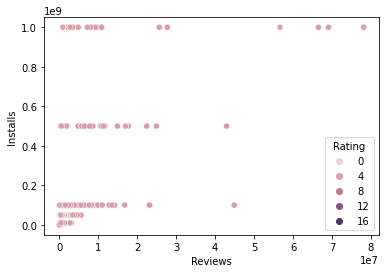

In [14]:
# # (6) Confirm data is ready with further exploratory analysis

sns.scatterplot( 
    data=featuresDf, 
    x='Reviews',
    y='Installs', 
    hue='Rating'
)

In [15]:
# (7) Training, Testing (and/or Validation) data split 

# for example, 60/20/20